In [1]:
#%pip install tensorflow




Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
     ------------------------------------ 130.2/130.2 kB 170.6 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 645.9 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 821.4 kB/s eta 0:00:00
     ------------------------------------ 442.0/442.0 kB 987.9 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 5.5/5.5 MB 1.0 MB/s eta 0:00:00
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
     -------------------------------------- 938.6/938.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 24.4/24.4

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import tensorflow as tf

print(tf.__version__)



2.15.0


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv("Churn_Modelling.csv")


In [13]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
##divide the dataset into dependent and independent feature:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [18]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [21]:
##feature engineering:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [24]:
#concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [27]:
X=pd.concat([X,geography,gender],axis=1)

In [28]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [30]:
#splitting the dataset into training and test set:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
#feature scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(8000, 11)

In [34]:
##part 2 create ann:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [35]:
##lets initial the ann
classifier=Sequential()

In [38]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [66]:
# Adding the input layer and the second hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [67]:
#dropout:
classifier.add(Dropout(0.3))

In [68]:
# Adding the input layer and the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [69]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [70]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [71]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [72]:
#Early stopping:
import tensorflow as tf


early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [73]:
##test
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 4ms/step - loss: 0.4505 - accuracy: 0.7959 - val_loss: 0.4013 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3996 - accuracy: 0.8026 - val_loss: 0.3867 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3866 - accuracy: 0.8255 - val_loss: 0.3819 - val_accuracy: 0.8508
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3798 - accuracy: 0.8309 - val_loss: 0.4118 - val_accuracy: 0.8300
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3759 - accuracy: 0.8322 - val_loss: 0.4117 - val_accuracy: 0.8478
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3690 - accuracy: 0.8438 - val_loss: 0.3790 - val_accuracy: 0.8459
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3697 - accuracy: 0.8405 - val_loss: 0.4020 - val_accuracy:

In [74]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

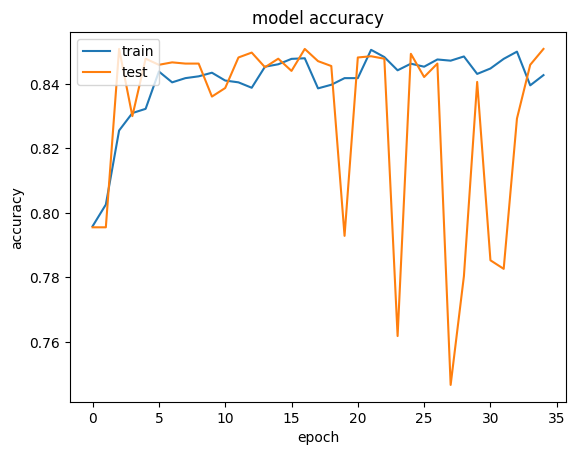

In [75]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

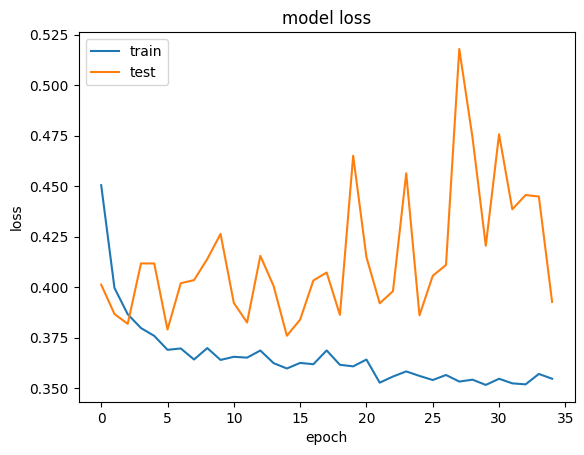

In [76]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 1s 5ms/step


In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1489,  106],
       [ 185,  220]], dtype=int64)

In [79]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [80]:
score

0.8545

In [81]:
##get the weights
wt=classifier.get_weights()

In [65]:
wt



[array([[ 1.0659568e-01,  1.3967352e+00,  5.0262529e-01, -3.9264075e-03,
          2.9846290e-01,  5.7214129e-01,  2.6413085e+00, -1.5418400e-02,
         -5.4066253e-01, -1.3707243e-01, -8.3546519e-01],
        [ 5.3299350e-01, -1.9680302e+00, -9.9757558e-01, -2.9753283e-01,
         -1.9015048e+00,  1.5312836e+00, -3.3100705e+00,  3.1934597e+00,
          4.2626386e+00, -3.9219720e+00, -3.1651869e+00],
        [ 1.5979819e-01,  3.2624680e-01,  7.5757319e-01, -2.9994461e-01,
          2.3478866e+00, -8.6577833e-01, -1.3419858e+00,  2.5846022e-01,
          5.5749513e-02, -9.2503208e-01,  9.2923391e-01],
        [ 1.5372391e+00,  1.1431923e+00, -1.8660960e+00, -3.5919492e+00,
          1.9906976e+00,  2.1195729e+00, -9.4112194e-01,  2.6190165e-01,
         -8.1201605e-02,  6.2872338e-01,  7.1361446e-01],
        [ 4.8847742e+00, -1.5565858e+00,  3.5638267e-01, -4.5324311e+00,
         -3.8303912e-01,  6.9257272e-03,  1.1071029e+00,  1.7763330e-01,
         -2.6196144e+00,  6.0144049e-0